#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Credit Card Customer Segmentation</span>

<p align="center" style="display: block; max-width: 100%;">
  <img src="https://media.istockphoto.com/id/1367581709/vector/credit-card-icon.jpg?s=612x612&w=0&k=20&c=wTyQsDnKyN2YRbUMaqjcJEfLXShNoTx9fUqnPOZCqes=" style="max-width: 22%; height: auto;">
</p>


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>


In [2]:
import pandas as pd

df = pd.read_csv('./BankChurners.csv', header = 0)
df = df[df.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df_info = pd.DataFrame(df.dtypes, columns = ['Dtype'])
df_info = df_info.iloc[:, :-2]
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Unique,Null
CLIENTNUM,10127,0
Attrition_Flag,2,0
Customer_Age,45,0
Gender,2,0
Dependent_count,6,0
Education_Level,7,0
Marital_Status,4,0
Income_Category,6,0
Card_Category,4,0
Months_on_book,44,0


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

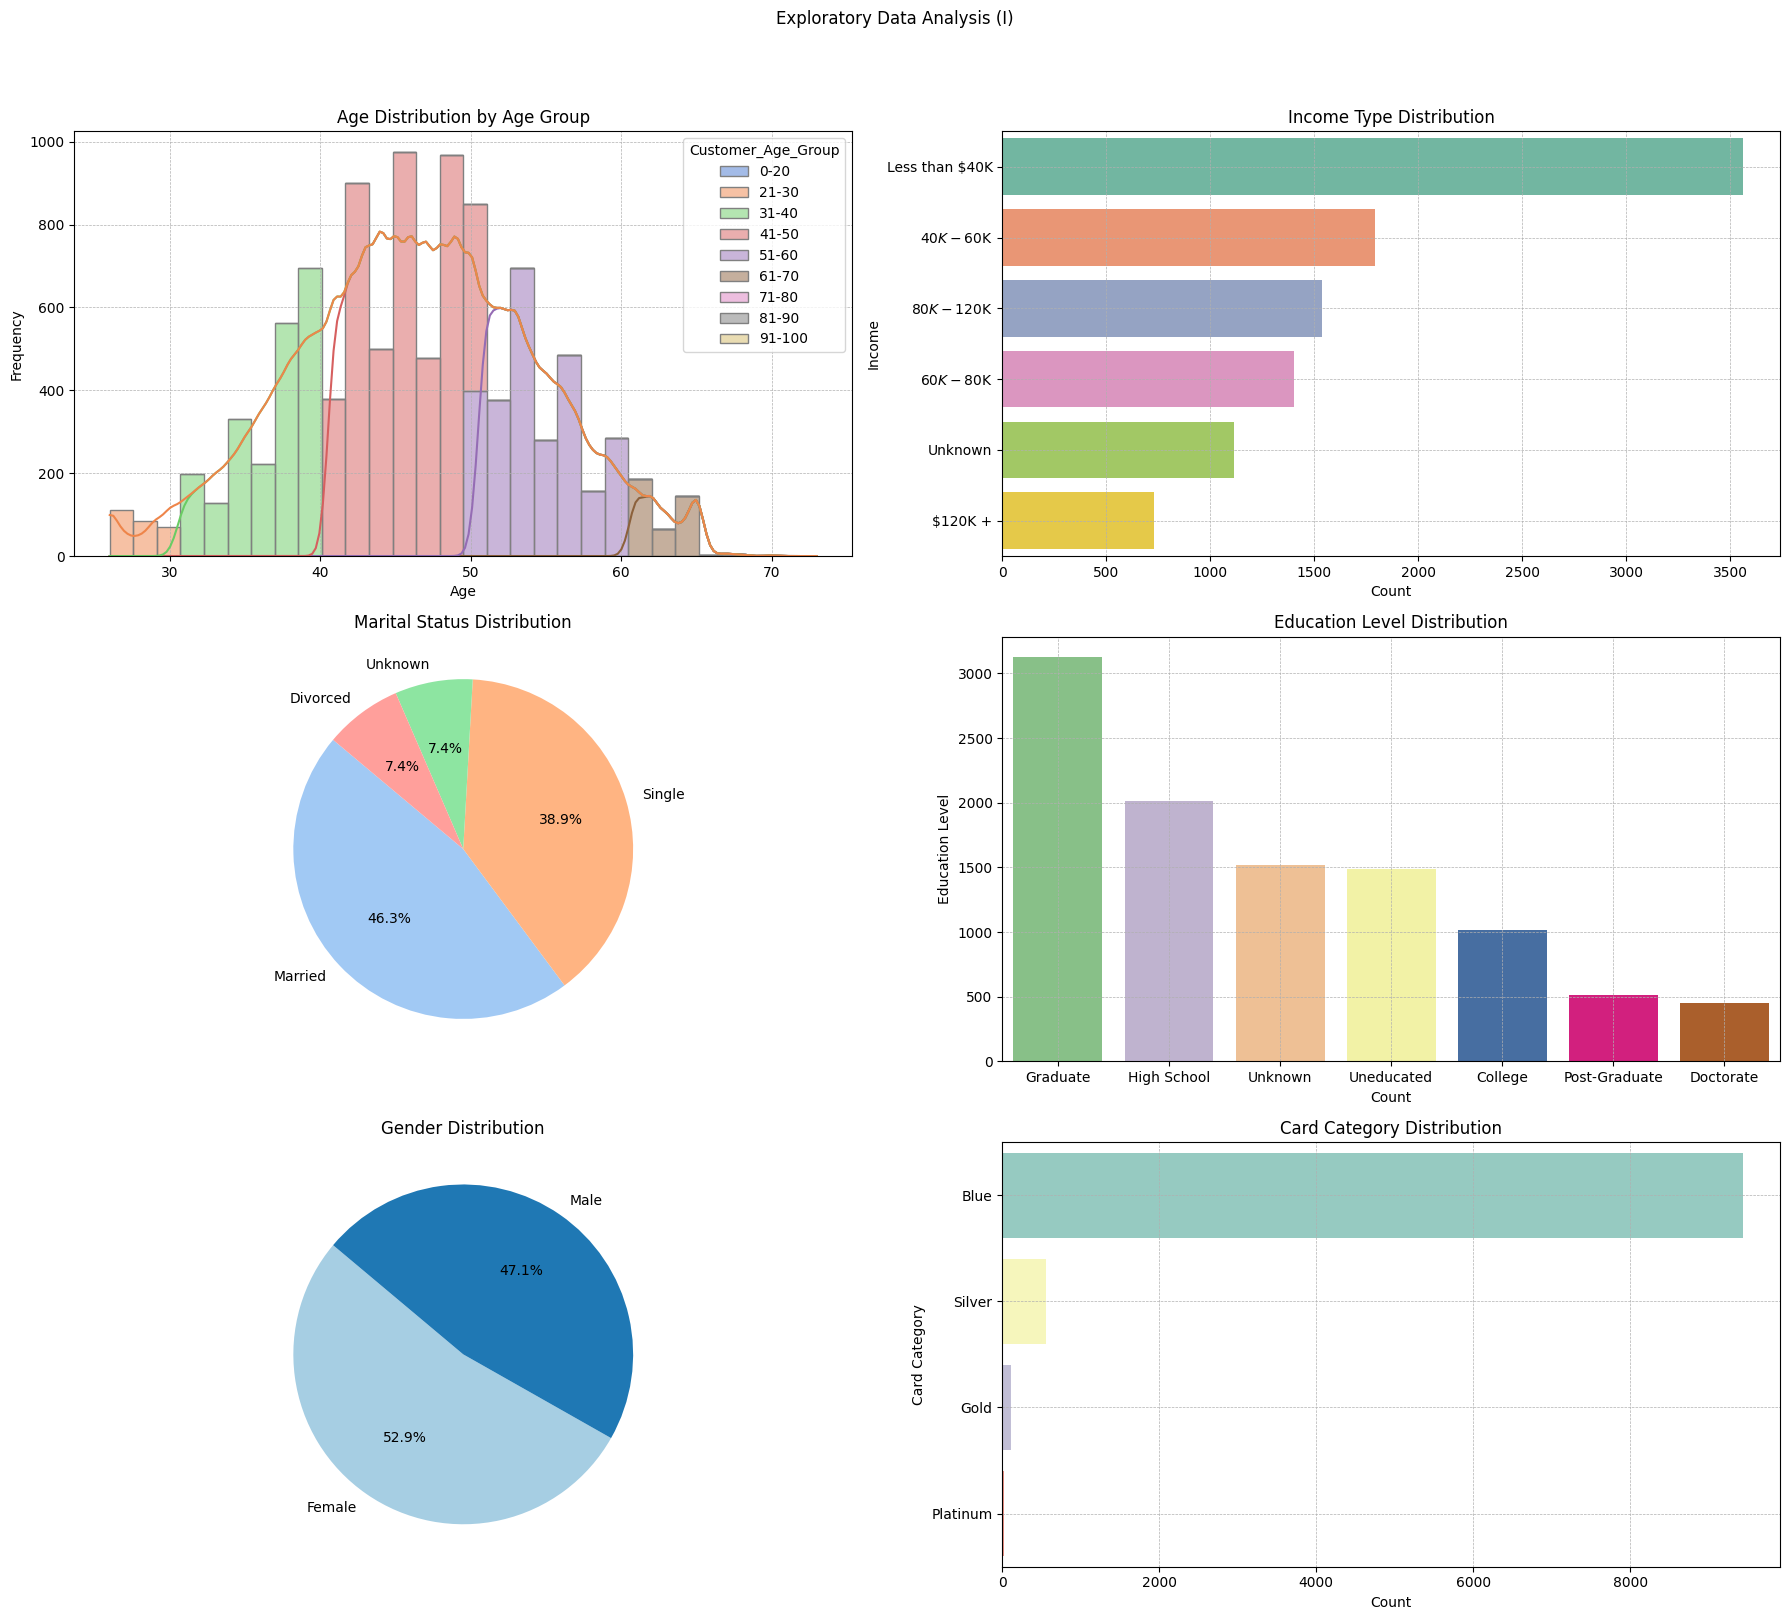

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 17))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
age_bins = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = age_bins)
sns.histplot(data=df, x = 'Customer_Age', hue = 'Customer_Age_Group', multiple = 'stack', palette = 'muted', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Income Type Distribution
job_types = df['Income_Category'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, income in enumerate(job_types):
    sns.barplot(x=[df[df['Income_Category'] == income]['Income_Category'].count()], y = [income], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Income Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("pastel", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'Education_Level', data = df, order = df['Education_Level'].value_counts().index, ax = axes[1, 1], palette = 'Accent')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', labelsize = 'medium')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Gender Status Distribution
gender_counts = df['Gender'].value_counts()
axes[2, 0].pie(gender_counts, labels = gender_counts.index.map({'F': 'Female', 'M': 'Male'}), autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Paired", len(gender_counts)))
axes[2, 0].set_title('Gender Distribution')

# Card Category Distribution
card_category = df['Card_Category'].value_counts().index
colors = sns.color_palette("Set3", len(job_types))
for i, card in enumerate(card_category):
    sns.barplot(x=[df[df['Card_Category'] == card]['Card_Category'].count()], y = [card], ax = axes[2, 1], color = colors[i])
axes[2, 1].set_title('Card Category Distribution')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('Card Category')
axes[2, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()


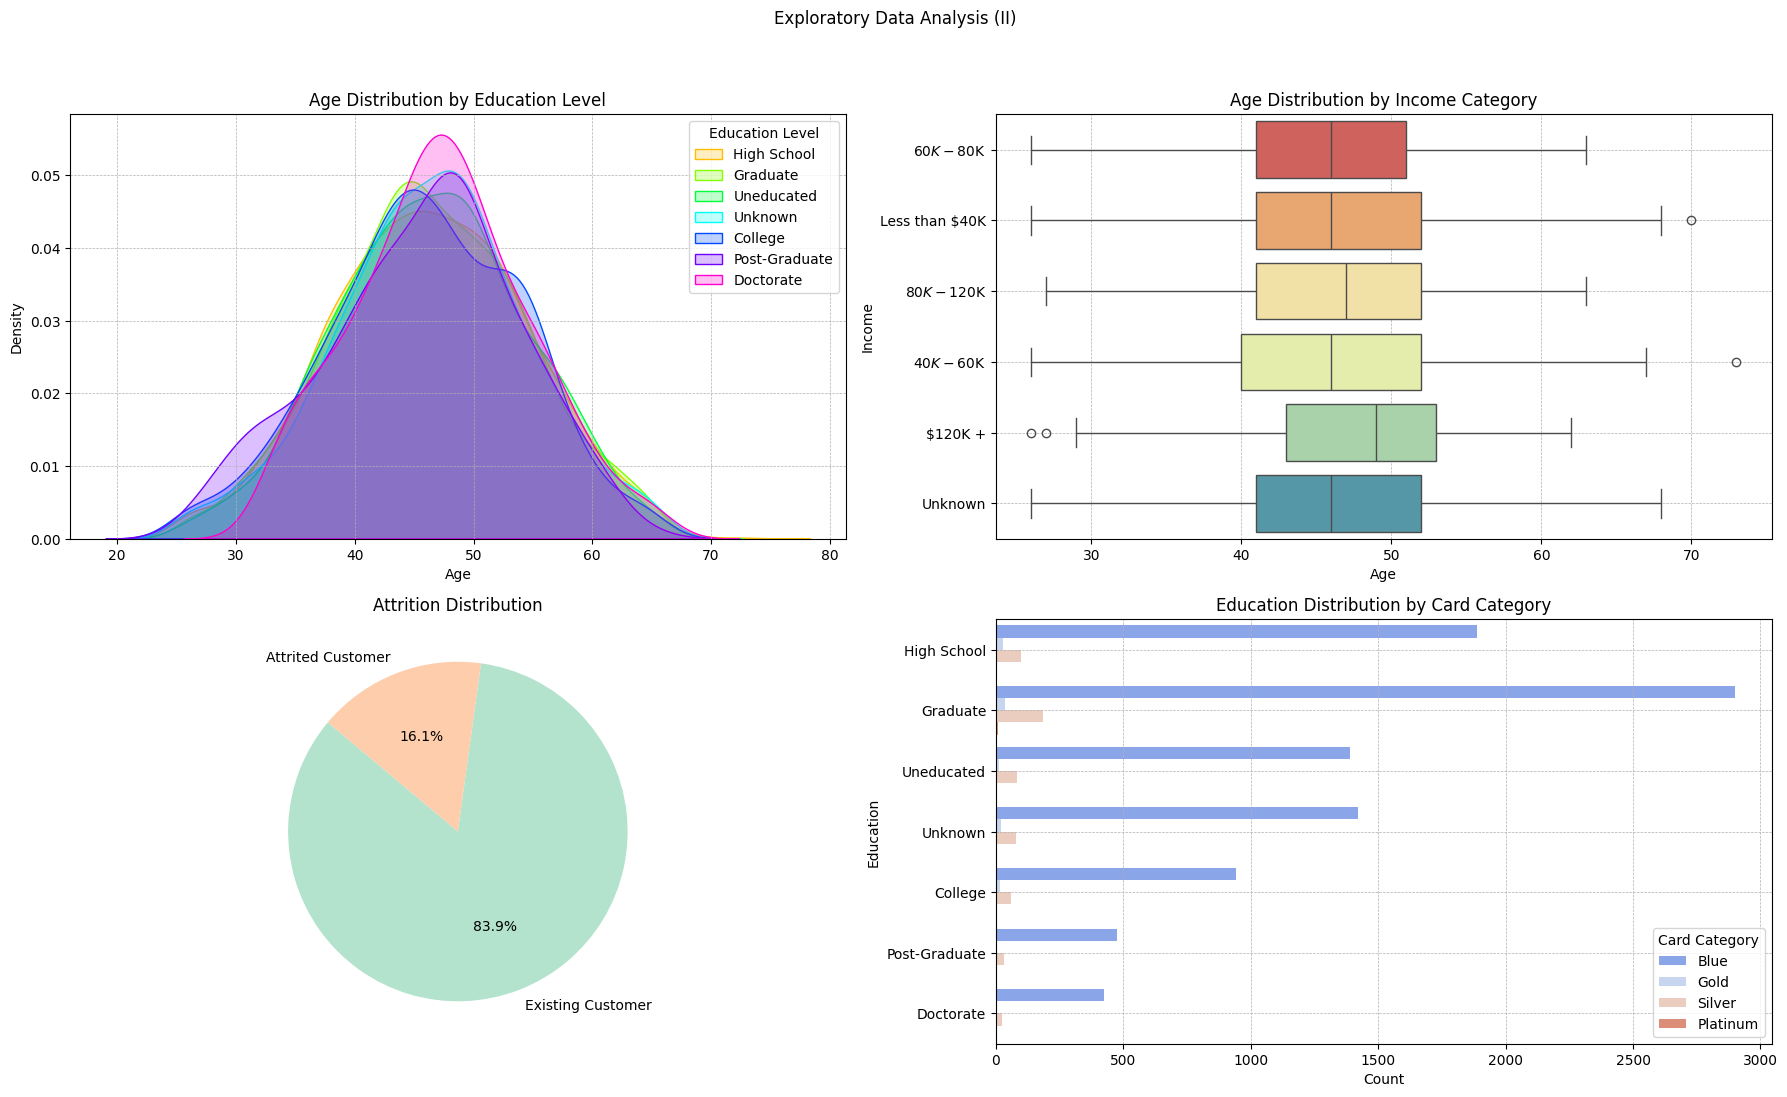

In [7]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 11.5))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['Education_Level'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['Education_Level'] == level]['Customer_Age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Age and Income Distribution
sns.boxplot(x = 'Customer_Age', y = 'Income_Category', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Income Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True)
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Attrition Flag Distribution
attrition_counts = df['Attrition_Flag'].value_counts()
axes[1, 0].pie(attrition_counts, labels = attrition_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Pastel2", len(attrition_counts)))
axes[1, 0].set_title('Attrition Distribution')

# Education and Card Category Loan Distribution
sns.countplot(y = 'Education_Level', hue = 'Card_Category', data = df, ax = axes[1, 1], palette = 'coolwarm')
axes[1, 1].set_title('Education Distribution by Card Category')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education')
axes[1, 1].legend(title = 'Card Category')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()


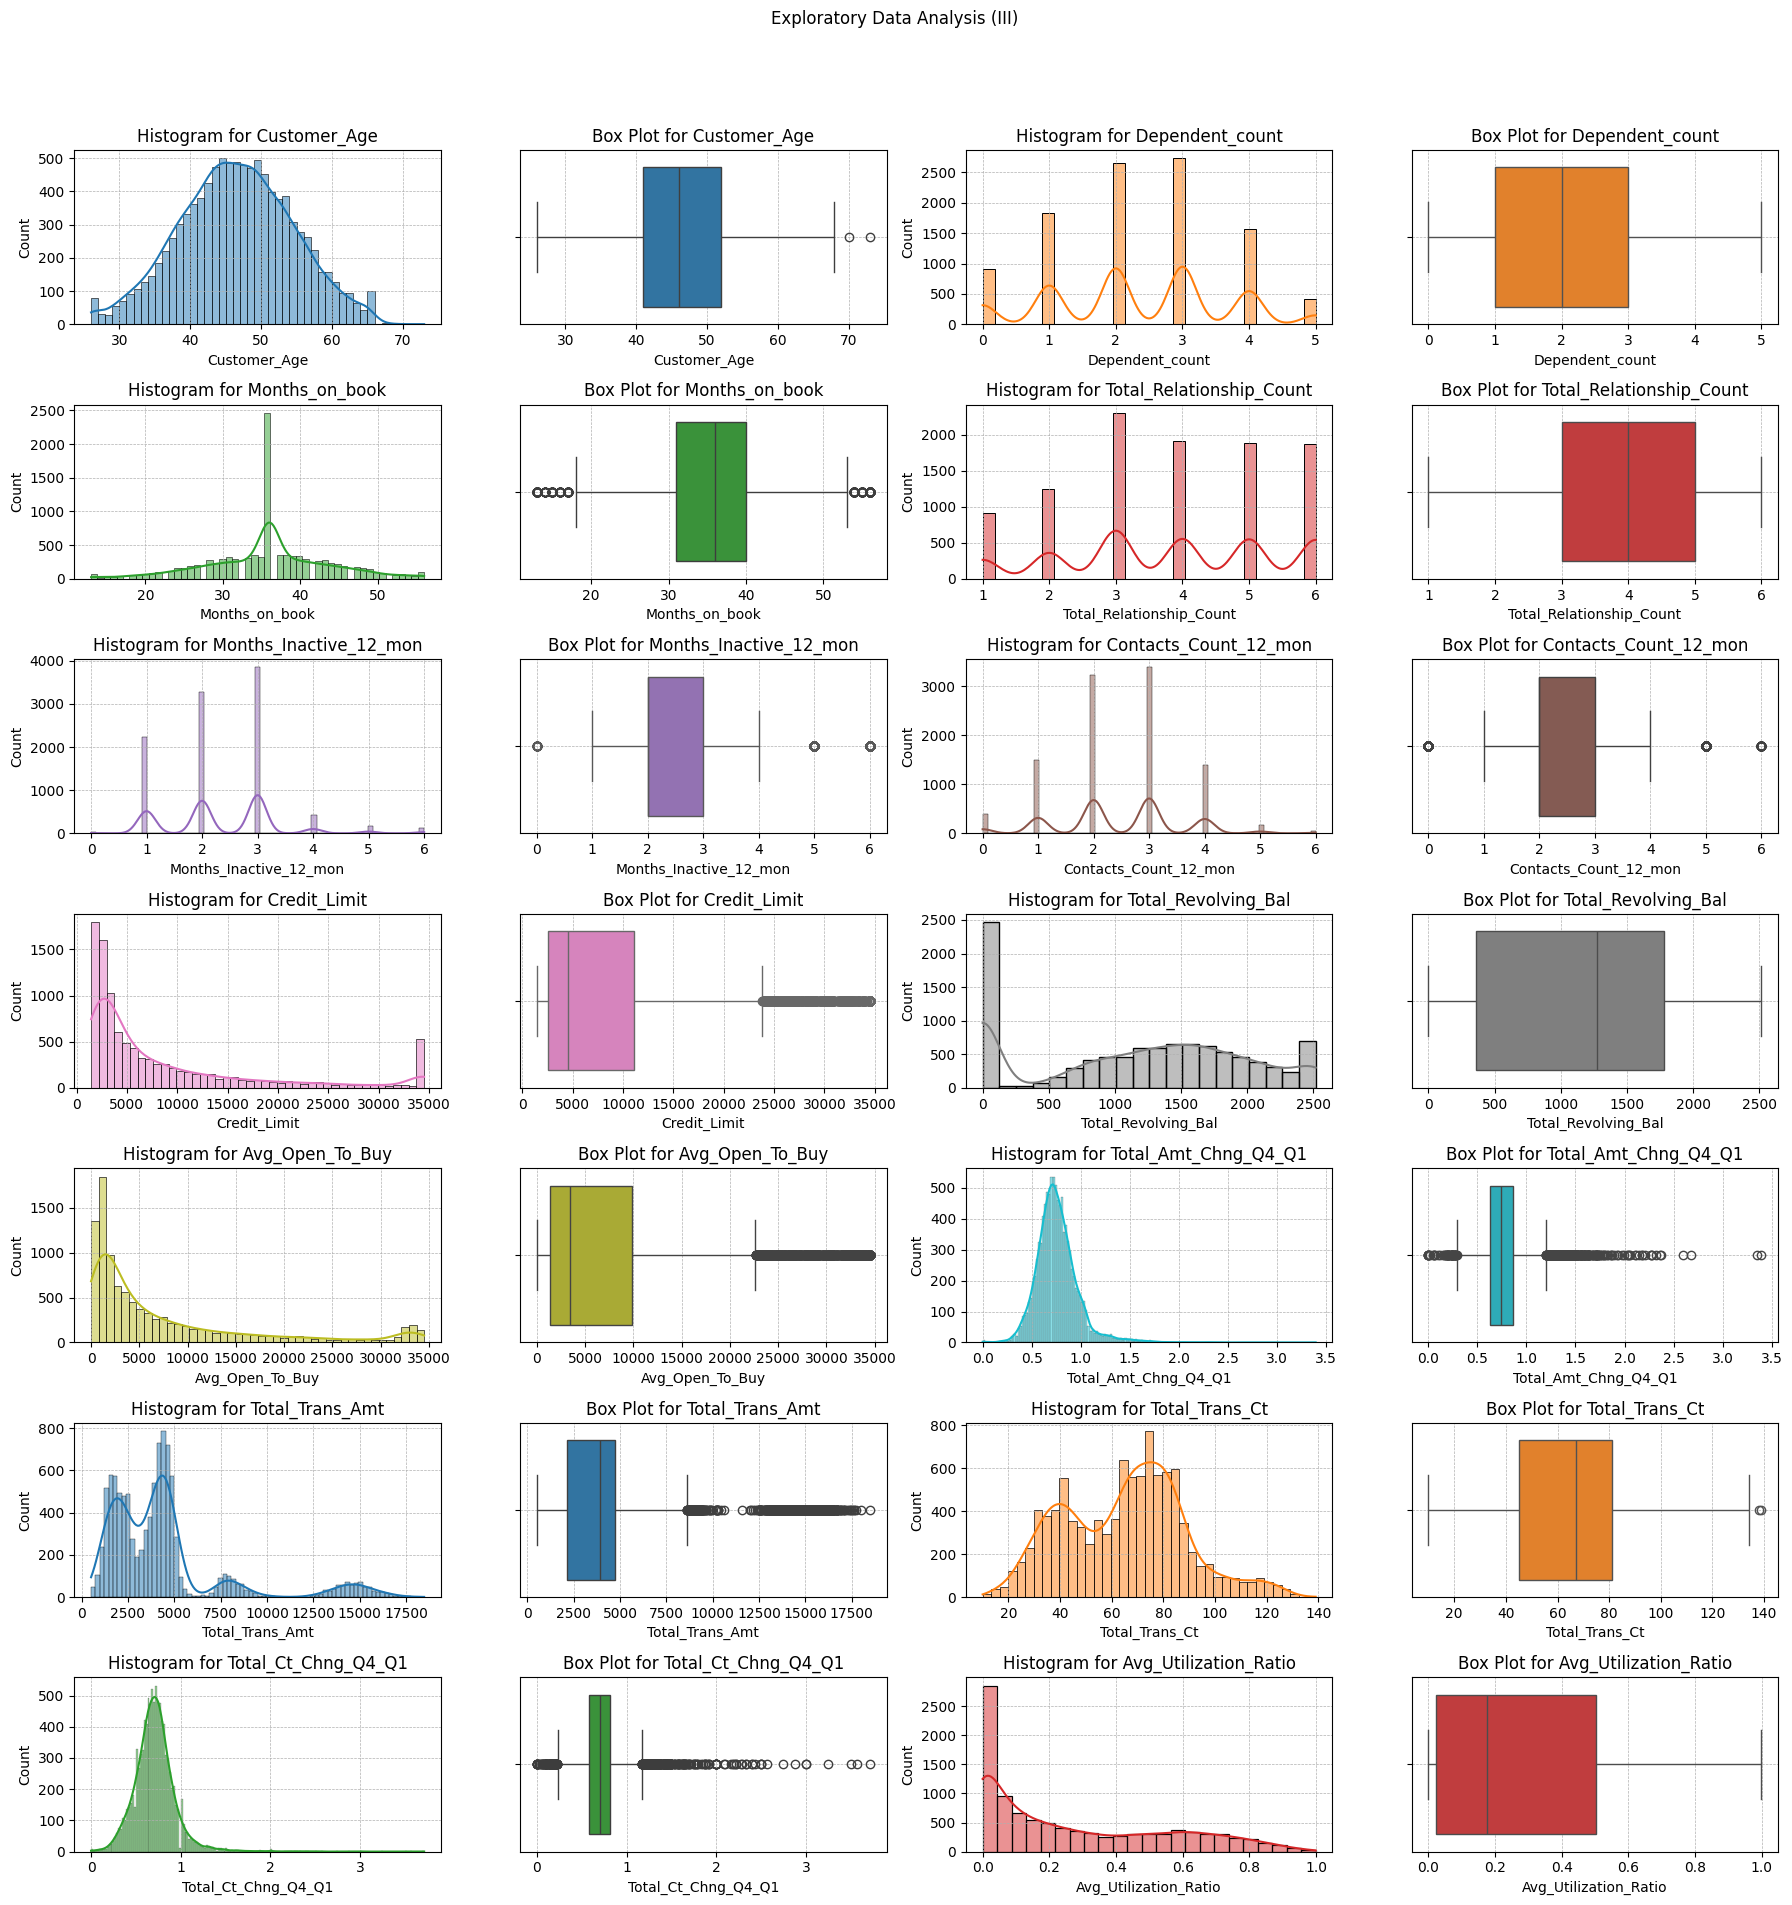

In [8]:
# List of columns to plot
columns_to_plot = [
    "Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count",
    "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit",
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio"
]

# Set the color palette
palette = sns.color_palette("tab10")

rows_needed = 7

fig, axes = plt.subplots(nrows=rows_needed, ncols=4, figsize=(18, 20))
fig.suptitle('Exploratory Data Analysis (III)')

# Plot each numerical column
for i, column in enumerate(columns_to_plot):
    # Histogram with density plot
    sns.histplot(df[column], ax=axes[i // 2, (i % 2) * 2], kde=True, color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2].set_title(f'Histogram for {column}')
    axes[i // 2, (i % 2) * 2].grid(True, which="both", ls="--", linewidth=0.5)
    
    # Box plot
    sns.boxplot(x=df[column], ax=axes[i // 2, (i % 2) * 2 + 1], color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2 + 1].set_title(f'Box Plot for {column}')
    axes[i // 2, (i % 2) * 2 + 1].grid(True, which="both", ls="--", linewidth=0.5)

# Adjust subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.91)

# Display the plot
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

- El número del cliente es irrelevante para el análisis, por lo que se elimina dicha columna.
</div>

In [9]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=['Customer_Age_Group'])

- El salario de los clientes en uno de los factores críticos para los servicios provistos por la compañía de tarjetas de crédito. Se excluyen aquellos clientes cuyos ingresos son desconocidos, lo que servirá para segmentar a los clientes de manera más efectiva.

In [10]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

- Se agrupan los clientes divorciados con los clientes solteros dado que el aspecto importante para el análisis es saber si el cliente tiene pareja o no.

In [12]:
df['Marital_Status'].value_counts()

Married     4194
Single      3499
Unknown      667
Divorced     655
Name: Marital_Status, dtype: int64

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

- Como el porcentaje de los clientes que tienen una tarjeta Oro o Platino es tan pequeño, se agrupan estas categorías con las tarjetas Plata, creando una nueva categoría, principalmente para distinguir estos clientes de aquellos que poseen la tarjeta más básica.

In [14]:
df['Card_Category'].value_counts()

Blue        8391
Silver       502
Gold         107
Platinum      15
Name: Card_Category, dtype: int64

In [15]:
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver+')

- Se remueven las columnas que presentan outliers significativos que están muy alejados de los distribución de los datos

In [16]:
def remove_outliers(df, columns):

    # Create a copy of the dataframe
    clean_df = df.copy()
    
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
        
    return clean_df

columns_to_check = ["Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1"]

df_no_outliers = remove_outliers(df, columns_to_check)


In [17]:
df = df_no_outliers

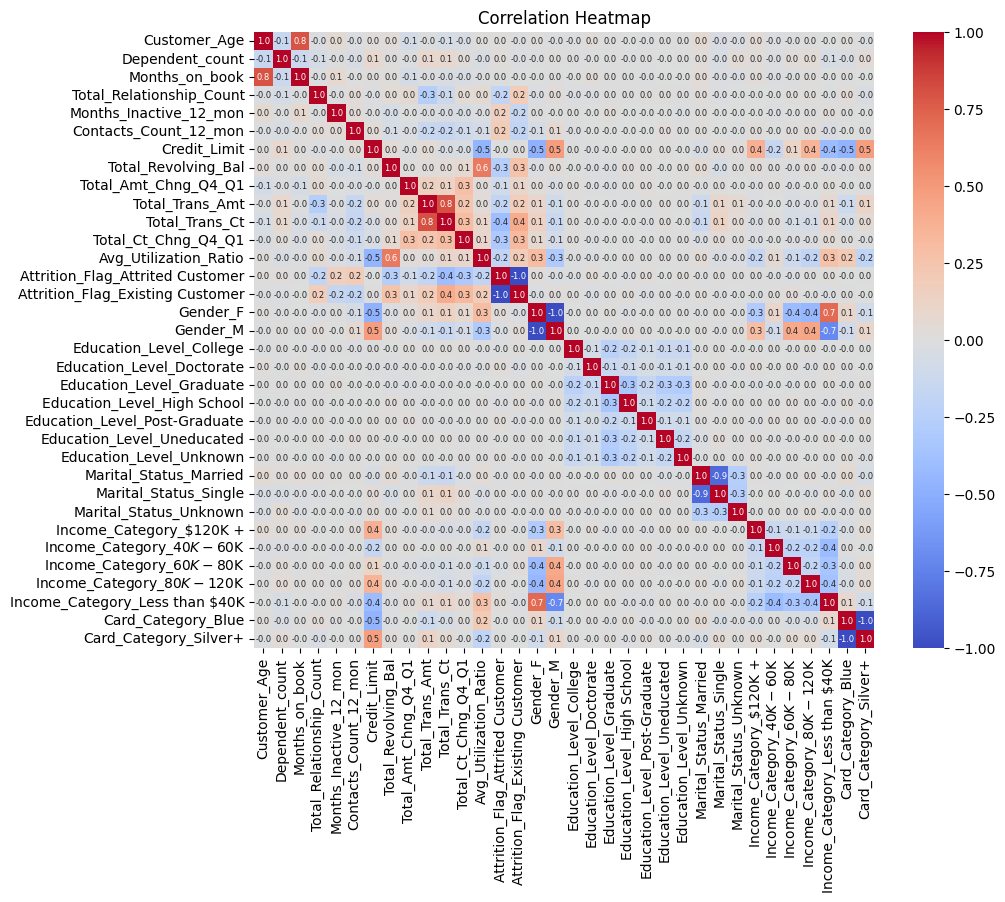

In [114]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap = "coolwarm", fmt = ".1f", annot_kws = {"size": 6})
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

- Se elimina la columna `Avg_Open_To_Buy` puesto que tiene correlación perfecta con `Credit_Limit` y sería redundante mantener ambas variables

In [19]:
df = df.drop(columns=['Avg_Open_To_Buy'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7636 entries, 10 to 10125
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7636 non-null   object 
 1   Customer_Age              7636 non-null   int64  
 2   Gender                    7636 non-null   object 
 3   Dependent_count           7636 non-null   int64  
 4   Education_Level           7636 non-null   object 
 5   Marital_Status            7636 non-null   object 
 6   Income_Category           7636 non-null   object 
 7   Card_Category             7636 non-null   object 
 8   Months_on_book            7636 non-null   int64  
 9   Total_Relationship_Count  7636 non-null   int64  
 10  Months_Inactive_12_mon    7636 non-null   int64  
 11  Contacts_Count_12_mon     7636 non-null   int64  
 12  Credit_Limit              7636 non-null   float64
 13  Total_Revolving_Bal       7636 non-null   int64  
 14  Total_

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Preprocessing </span>

In [21]:
one_hot_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category", 
                "Card_Category", "Dependent_count", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Attrition_Flag"]
standard_cols = ["Customer_Age", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Months_on_book"]
minmax_cols = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal"]
power_cols = ["Total_Revolving_Bal", "Credit_Limit", "Avg_Utilization_Ratio"]

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

df_scaled = pd.DataFrame(preprocessing.fit_transform(df), columns = preprocessing.get_feature_names_out())

In [23]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   one-hot__Gender_F                          7636 non-null   float64
 1   one-hot__Gender_M                          7636 non-null   float64
 2   one-hot__Education_Level_College           7636 non-null   float64
 3   one-hot__Education_Level_Doctorate         7636 non-null   float64
 4   one-hot__Education_Level_Graduate          7636 non-null   float64
 5   one-hot__Education_Level_High School       7636 non-null   float64
 6   one-hot__Education_Level_Post-Graduate     7636 non-null   float64
 7   one-hot__Education_Level_Uneducated        7636 non-null   float64
 8   one-hot__Education_Level_Unknown           7636 non-null   float64
 9   one-hot__Marital_Status_Married            7636 non-null   float64
 10  one-hot__Marital_Status_

In [24]:
X = df_scaled.drop(['one-hot__Attrition_Flag_Attrited Customer', 'one-hot__Attrition_Flag_Existing Customer'], axis = 1)
y = df_scaled[['one-hot__Attrition_Flag_Attrited Customer', 'one-hot__Attrition_Flag_Existing Customer']]

In [25]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Ensemble - Random Forest </span>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Clustering Analysis </span>


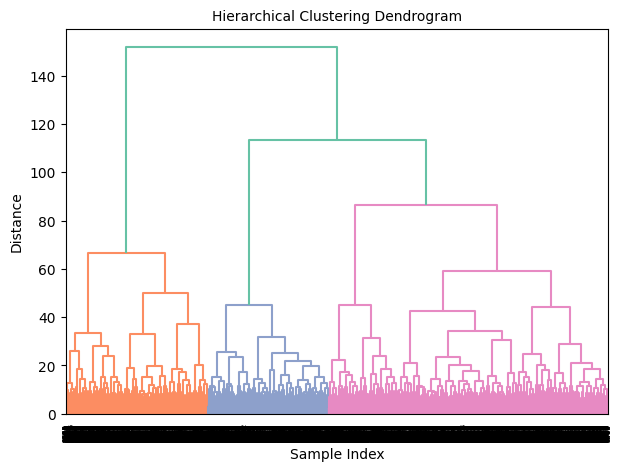

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_scaled, method = 'ward', metric = 'euclidean')
sns.set_palette('Set2')

plt.figure(figsize=(7, 5))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 10)
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.show()

In [27]:
from sklearn.cluster import KMeans
Ks = range(2, 20)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters = k, n_init=10, random_state = 42).fit(df_scaled) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

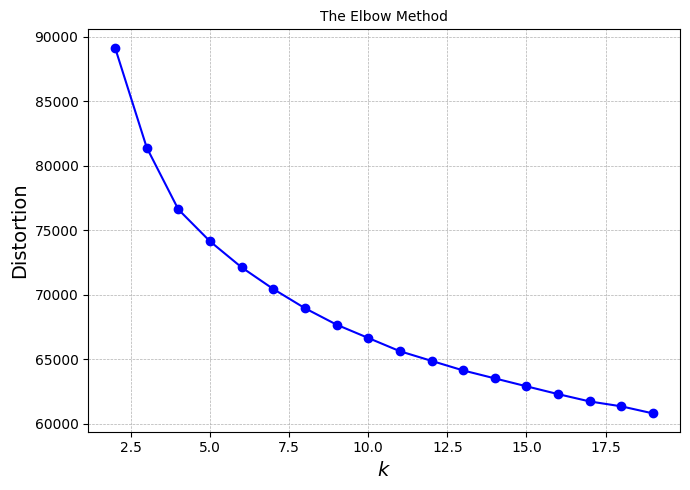

In [28]:
plt.figure(figsize = (7, 5))
plt.title('The Elbow Method', fontsize = 10)
plt.plot(Ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Distortion", fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

El **Método del codo** utiliza el cambio de pendiente para indicar un número potencialmente interesante de grupos. En este caso parece haber un cambio de pendiente entre 3 y 4 clusters.
</div>

In [29]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_per_k]

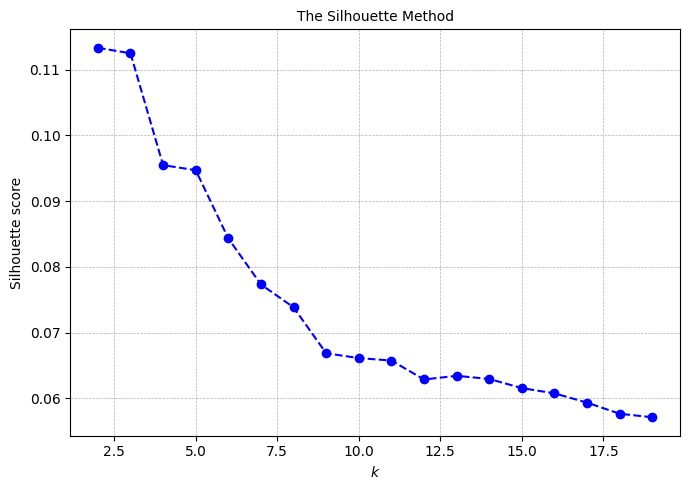

In [30]:
plt.figure(figsize = (7, 5))
plt.plot(Ks, silhouette_scores, "bo--")
plt.title('The Silhouette Method', fontsize = 10)
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

El **Método de la Silueta** mide qué tan similar es un punto a su propio grupo en comparación con otros grupos y calcula un coeficiente. Cuanto mayor sea el coeficiente final, más óptimo será el número de conglomerados. Los coeficientes más altos para el caso se alcanzan en 3 clusters nuevamente.
</div>

<div style="text-align: justify;">

El número de clusters idóneo es equivalente a 3. Sin embargo, la clase a predecir tiene 2 valores, si el cliente sigue manteniendo la tarjeta de crédito o no, siendo una salida binaria. Se hace un análisis para ver las características y la distribución de los clientes en los clusters fijados.

Por otra parte, dada el gran número de columnas y la alta dimensionalidad del dataset, se aplica PCA para reducir el número de dimensiones a 2, con el objetivo de visualizar la distribución de los clusters en gráficos 2D.

</div>

In [31]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components = 2)
df_scaled_2d = pca.fit_transform(df_scaled)


<div style="text-align: justify;">

La agrupación aglomerativa, a diferencia de KMeans, puede manejar grupos no esféricos y de diferentes tamaños. Proporciona una jerarquía de grupos, que puede ser útil para análisis posteriores
</div>

In [32]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
clustering_model.fit(df_scaled_2d)
clusters = clustering_model.labels_
clusters

array([1, 2, 1, ..., 1, 1, 1])

In [33]:
import collections

print(collections.Counter(clusters))

Counter({1: 3227, 0: 2258, 2: 2151})


In [34]:
df_clusters = df.copy()
df_clusters["Cluster"] = clusters

df_clusters.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,0.831,1201,42,0.680,0.217,1
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1.190,1570,29,0.611,0.279,2
20,Existing Customer,47,M,1,Doctorate,Single,$60K - $80K,Blue,42,5,2,0,20979.0,1800,0.906,1178,27,0.929,0.086,1
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1.047,692,16,0.600,0.000,2
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,0.573,1126,23,0.353,0.626,0


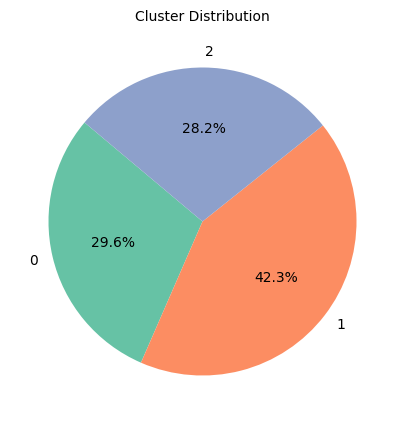

In [81]:
# Count of each cluster
cluster_counts = df_clusters["Cluster"].value_counts().sort_index()

# Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors = sns.color_palette("Set2"))

plt.title('Cluster Distribution', fontsize = 10)
plt.show()

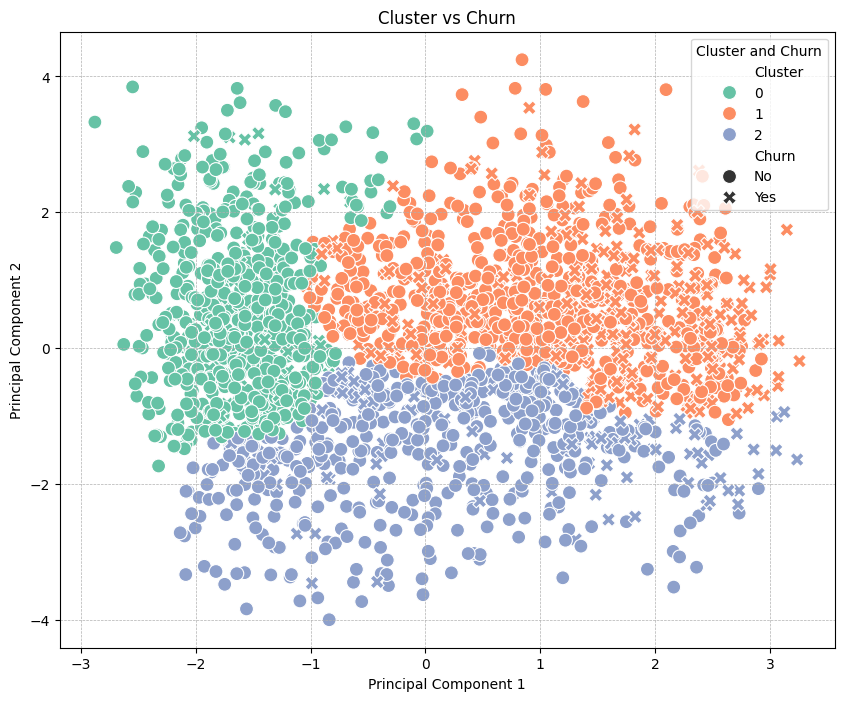

In [53]:
df_plot = pd.DataFrame(df_scaled_2d, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = clusters
df_plot['Churn'] = y_test['one-hot__Attrition_Flag_Attrited Customer'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Plot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_plot, x = 'PCA1', y = 'PCA2', hue = 'Cluster', style = 'Churn', palette = 'Set2', s = 100)

plt.title('Cluster vs Churn', fontsize = 12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster and Churn', loc='best')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


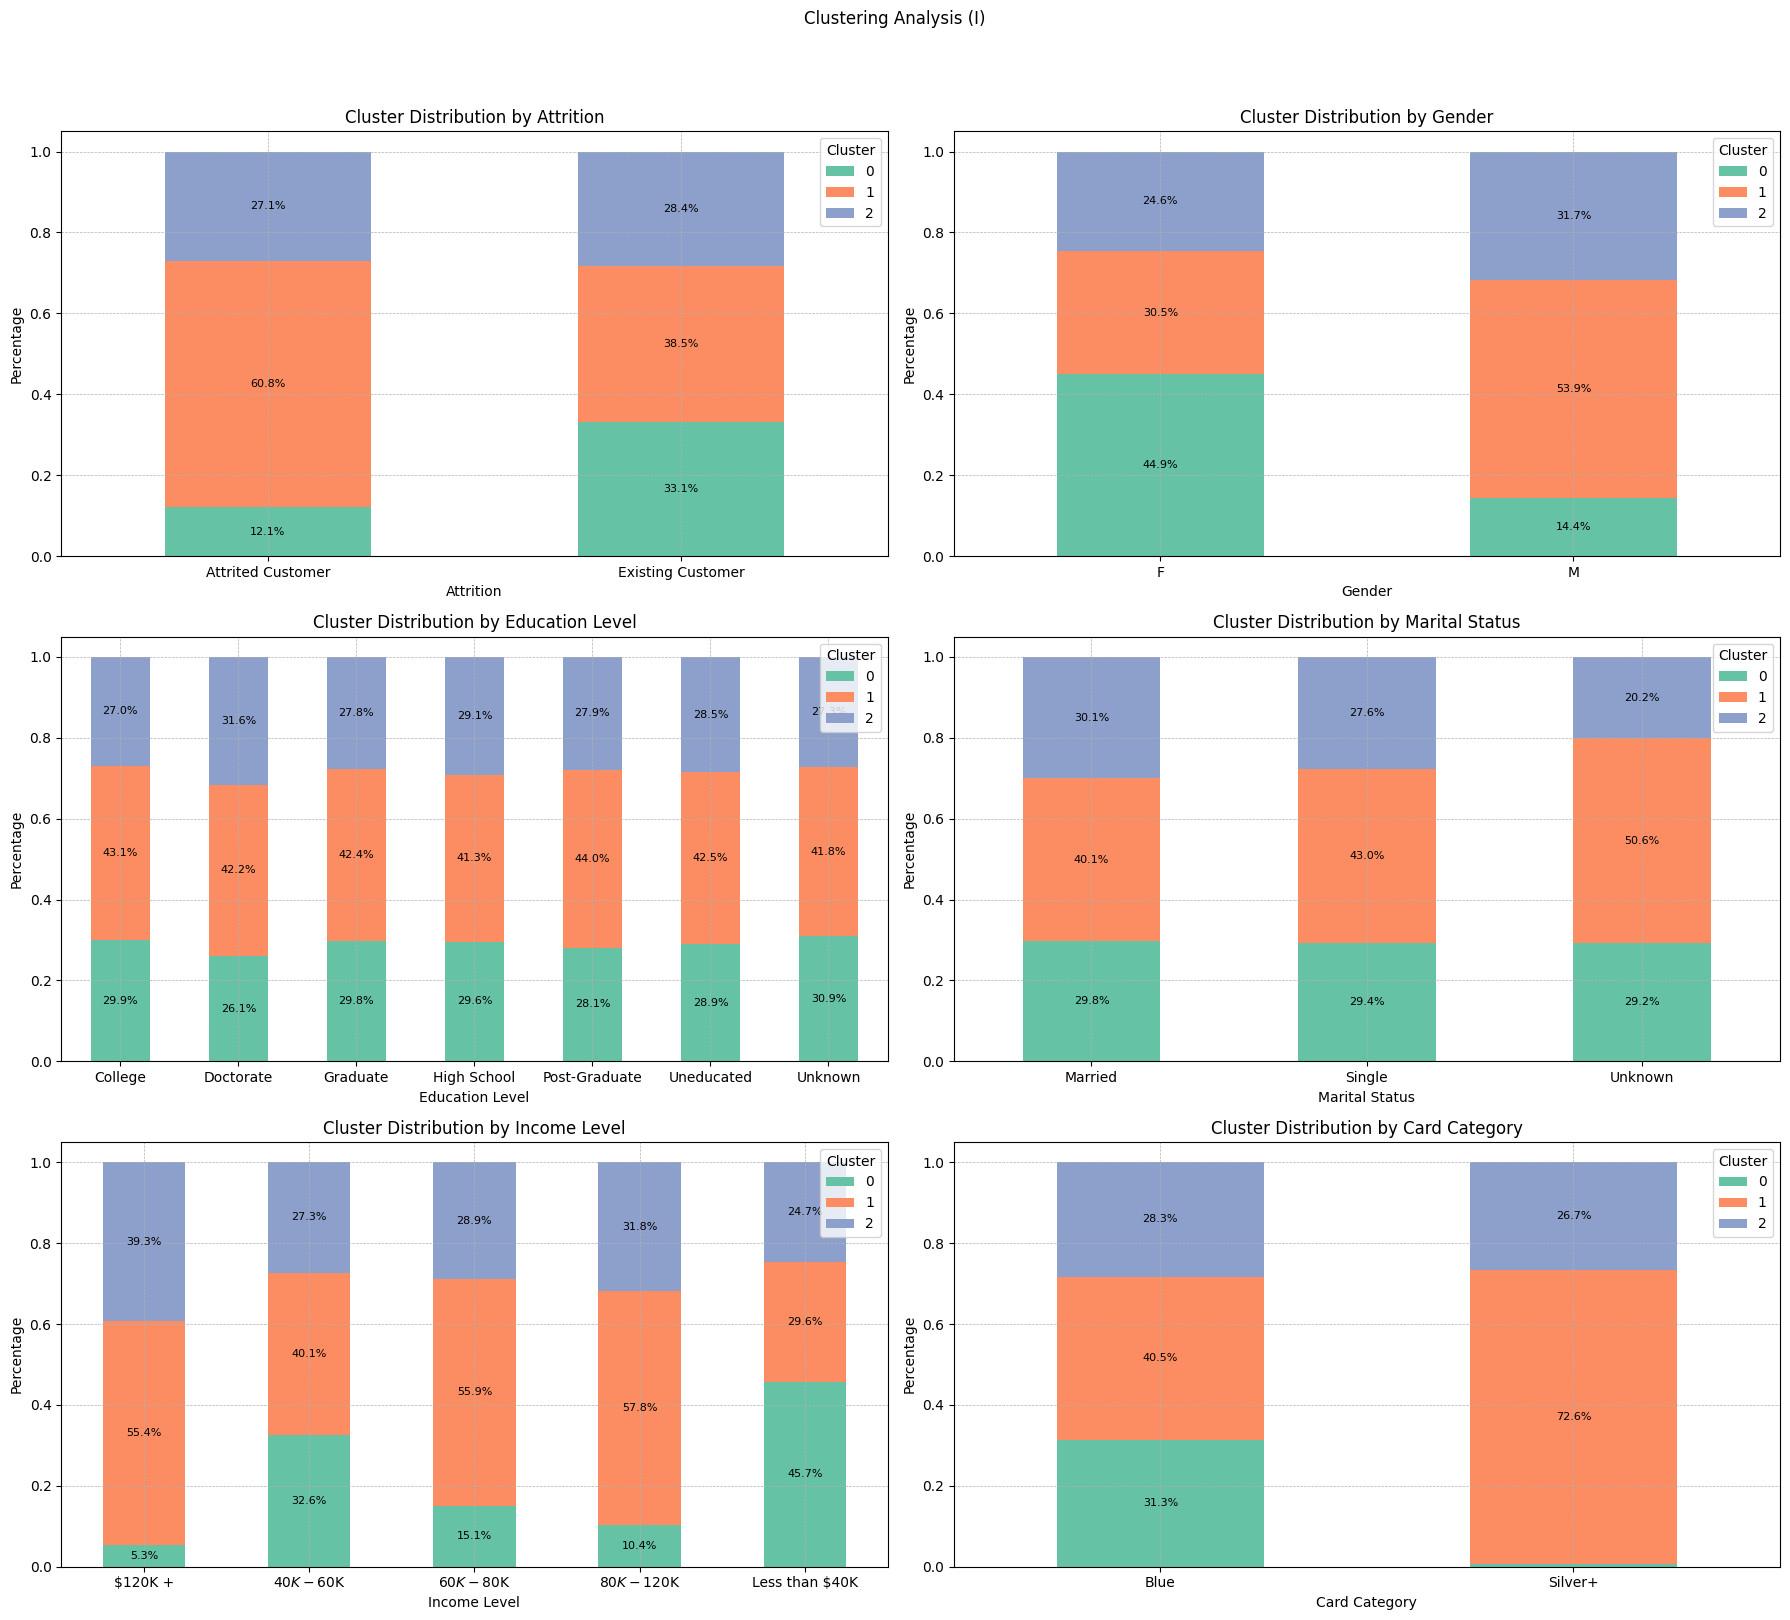

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_stacked_bar_data(df, category_col, cluster_col):
    # Calculate the count of each group
    group_size = df.groupby([category_col, cluster_col]).size().unstack(fill_value=0)
    # Calculate the percentage of each category within each cluster
    percentage_data = group_size.divide(group_size.sum(axis=1), axis=0)
    return percentage_data

def plot_stacked_bar(data, ax, title, xlabel):
    # Plotting the data
    data.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("Set2"))

    # Adding annotations
    for bar in ax.patches:
        bar_x = bar.get_x() + bar.get_width() / 2
        bar_y = bar.get_y() + bar.get_height() / 2
        percentage = f'{bar.get_height() * 100:.1f}%'
        if bar.get_height() > 0.01:  # This filters out the negligible percentages
            ax.text(bar_x, bar_y, percentage, ha='center', va='center', fontsize=8, color='black')

    # Setting chart title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.tick_params(axis='x', labelrotation=0)

nominal_categories = {
    'Attrition_Flag': 'Attrition',
    'Gender': 'Gender',
    'Education_Level': 'Education Level',
    'Marital_Status': 'Marital Status',
    'Income_Category': 'Income Level',
    'Card_Category': 'Card Category'
}

fig, axes = plt.subplots(3, 2, figsize=(18, 17))
fig.suptitle('Clustering Analysis (I)')

# Creating subplots for each category
for i, (col, name) in enumerate(nominal_categories.items()):
    ax = axes[i//2, i%2]
    percentage_data = prepare_stacked_bar_data(df_clusters, col, 'Cluster')
    plot_stacked_bar(percentage_data, ax, f'Cluster Distribution by {name}', name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


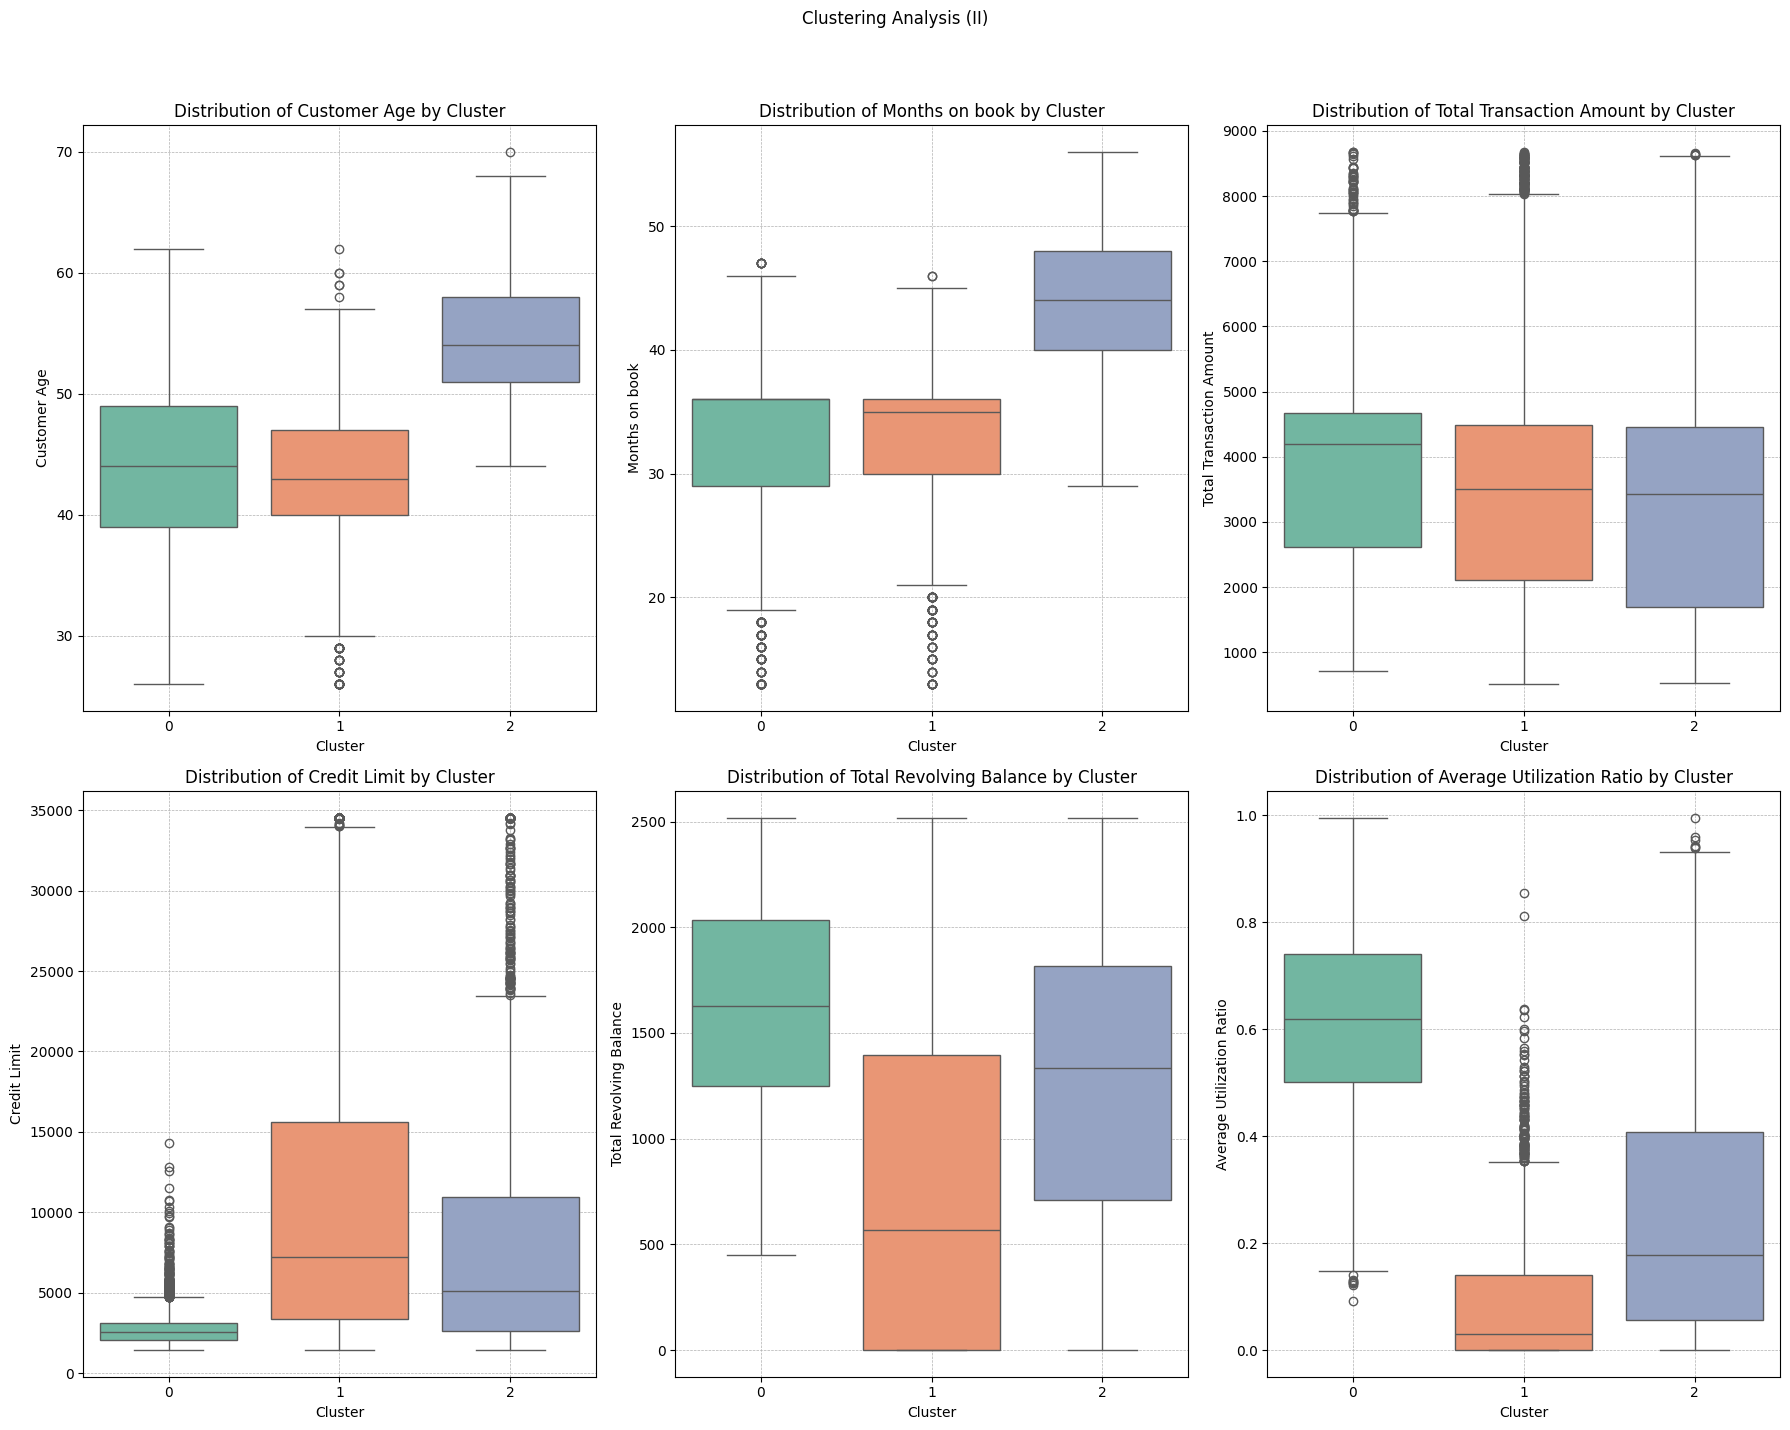

In [121]:
numerical_categories = {
    'Customer_Age': 'Customer Age',
    'Months_on_book': 'Months on book',
    'Total_Trans_Amt': 'Total Transaction Amount',
    'Credit_Limit': 'Credit Limit',
    'Total_Revolving_Bal': 'Total Revolving Balance',
    'Avg_Utilization_Ratio': 'Average Utilization Ratio'
}

# Creating the figure and axes for a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('Clustering Analysis (II)')

# Loop over the dictionary items and create a boxplot for each category
for i, (column_key, column_name) in enumerate(numerical_categories.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x='Cluster', y=column_key, data=df_clusters, ax=ax, palette="Set2")
    ax.set_title(f'Distribution of {column_name} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column_name)
    ax.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout to prevent overlap and to allocate space for titles and legends
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
